#  Individual Report 

In [444]:
# import libraries
import csv
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#%pylab inline

In [9]:
# in order to display all the columns:
pd.options.display.max_columns = 30
pd.options.display.max_rows = 30

# Preparation : Import Data

In [302]:
# import train dataset 
df = pd.read_csv('train.csv')

In [10]:
# dataset info
df.head(10)

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,adexchange,domain,url,urlid,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,1,14,fdfae6789b787899f1b875de3ab8b21a,1,u_Vh1OPkFv3q5CFdR,windows_ie,180.107.112.*,80,85,2,trqRTuToMTNUjM9r5rMi,d48a96ab59d7ad741a48e781de44efeb,null,433287550,468,60,1,0,5,612599432d200b093719dd1f372f7a30,300,54,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063"
1,0,2,20,372883147cdefbc495fb5082f79dde9b,1,u_VhkRL6dCOTLsq-c,windows_chrome,125.120.199.*,94,95,2,trqRTv14MqTR1m58uG,313e110c149d24b3236165d30879c595,null,2264242698,250,250,1,0,5,8dff45ed862a740986dbe688aafee7e5,249,42,15b749127478946f161a54dc0dad27c8,3476,"10063,10111"
2,0,5,9,2912cb5947e1fad450e2473c2f61ef75,1,u_VhkyORMrD8TP3GL,windows_ie,120.196.64.*,216,217,1,trqRTJTxX5scg4,845b72208c27b993daa11c8104449e22,null,mm_40135906_3486753_11388735,336,280,0,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,1458,10063
3,0,2,20,d7b7d61d1e50e1d27d210928d28a9b61,1,u_VhkyLRqVL2a4eWL,windows_ie,219.131.122.*,216,221,2,trqRTuMvjTN7X9KbuKz,ea6709db2703ae8698755629f1f9df32,null,2536830969,728,90,0,0,162,7184c9560e68e977187e67e45a4f3198,238,182,0f951a030abdaedd733ee8d114ce2944,3427,"10077,10111"
4,0,6,9,657d317dc4045bb79c2652abbea07530,1,u_Vh1zOJuQOtTCBgL,windows_chrome,123.190.78.*,40,48,1,trqRTu1YP5scFsf,b7b8e74eefbdd5cc1a9f0acb2e5c0d6c,null,mm_10075660_3500949_11453278,950,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,34,a3becb967c015e9acb5e72f22b100ef8,3476,"10031,13042,10006,10057,13866,10063,14273,1005..."
5,0,3,22,97948108bc353d0f3ef1e0142afb0343,1,u_Vh5h1p2SDvFsGMa,windows_ie,111.227.172.*,3,6,1,trqRTJubX5scFsf,37bdc8299d3b42e6f04ccf4fca64bacc,null,mm_14539978_2071324_8355258,300,250,1,1,0,911b2d84826786018761e8c0b0a3a60c,227,99,d29e59bf0f7f8243858b8183f14d4412,3358,10063
6,0,5,16,26739c29a9294f157930f3f5bb7f5dc9,1,u_D89EGm6FGGV,windows_chrome,27.46.201.*,216,217,2,333a4ab5e4ae8e17d7ca86237721ba7a,4bf89e8bc0f9e55e8305087441b5276c,null,2932492844,728,90,OtherView,Na,5,7330,277,61,null,2259,"13866,10006,10111,10063"
7,0,0,21,404f5a6f3a1dde4ae1811646c065df3c,1,u_D9MLsHCazAr,windows_chrome,112.92.88.*,216,220,4,1164f4caea2d39bc9dcc8dd22bb0e5c8,37a58da844768798ec368daff8a5e94b,null,9223372032560960619,960,90,FirstView,Na,0,10717,294,39,null,2821,"13042,10024,10006,10110,10031,10063"
8,0,4,17,39095668ca6fd532b7c6d3dfad538997,1,u_Vh5_LAT0322yFOl,windows_ie,218.77.12.*,201,213,2,trqRTv1EXQuYgMKE5SqW,da7852090bb61af96fbcd29898929149,null,3151450371,336,280,2,0,5,ff5123fb9333ca095034c62fdaaf51aa,300,111,361e128affece850342293213691a043,3386,null
9,0,0,17,dd3e2fd0370f672e6cbc5597673f72e1,1,u_VhTnL7d7PtB8XWC,windows_ie,122.137.146.*,55,57,3,5F1RQS9rg5scFsf,19422c57c90579925952ed859eaf3f4d,null,News_F_bottom_Width,1000,90,0,0,31,832b91d59d0cb5731431653204a76c0e,300,30,bebefa5efe83beee17a3d245e7c5085b,1458,"13403,10057,10063,10083,10006,10110"


In [4]:
df.shape

(2697738, 26)

In [284]:
# the log data format
df.iloc[0]

click                                            0
weekday                                          1
hour                                            14
bidid             fdfae6789b787899f1b875de3ab8b21a
logtype                                          1
userid                           u_Vh1OPkFv3q5CFdR
useragent                               windows_ie
IP                                   180.107.112.*
region                                          80
city                                            85
adexchange                                       2
domain                        trqRTuToMTNUjM9r5rMi
url               d48a96ab59d7ad741a48e781de44efeb
urlid                                         null
slotid                                   433287550
slotwidth                                      468
slotheight                                      60
slotvisibility                                   1
slotformat                                       0
slotprice                      

In [458]:
# check unique values
df.adexchange.unique()

array(['2', '1', '4', '3', 'null'], dtype=object)

In [6]:
# count unique values in each column
for c in df.columns:
    print(c + ": ",len(df[c].unique()))

click:  2
weekday:  7
hour:  24
bidid:  2697738
logtype:  1
userid:  2591064
useragent:  39
IP:  515530
region:  35
city:  370
adexchange:  5
domain:  24087
url:  833453
urlid:  1
slotid:  55983
slotwidth:  21
slotheight:  14
slotvisibility:  11
slotformat:  4
slotprice:  284
creative:  130
bidprice:  8
payprice:  301
keypage:  19
advertiser:  9
usertag:  814364


In [2]:
# columns index
df.columns

#### Some Data description:

- logtype: 1 for impression, repeated
- useragent: device/OS/browser
- adexchange: 1 to 4 id of the "auction house"
- urlid: null if is anonymous, in this case they all are
- slotvisitility: first view means that it appears without the user having to scroll down
- bidprice: the "optimal" bid price
- payprice: highest bid price from competitors, also called "market price" or "auction winning price"
- advertiser: Corresponds to a different categorie of the advertiser, this could be: "telecom", "Oil", etc

# Problem 1 : Statistical Analysis

### Five Sections

- General Trends
- Advertisers
- User Feedback
- Bidding Strategy
- eCPC

## 1. General RTB trends -------------------------------------------------

In [24]:
# Conduct analysis based on all records
train = df

In [32]:
# count records
print('There are', len(df), 'records in the dataset')

There are 2697738 records in the dataset


### Clicks

In [9]:
# clicks
df.click.value_counts('1')

0    0.999246
1    0.000754
Name: click, dtype: float64

In [15]:
# CTR
data = df
# Num click:
num_clics=len(data[data.click==1])
print ("num_clics: %d"%num_clics)
# number of impressions:
num_impressions=len(data)
print ("num_impressions: %d"%num_impressions)
# Click through Rate: number of Clicks / number ofImpressions
CTR=num_clics/num_impressions
print ("CTR: {:.4%}".format(CTR))   # Showing in percentage!

num_clics: 2034
num_impressions: 2697738
CTR: 0.0754%


### Functions for getting info

In [113]:
#def rescue_code(function):
#    import inspect
#   get_ipython().set_next_input("".join(inspect.getsourcelines(function)[0]))

In [427]:
# get top CTR
def get_topctr (x):
    dfclick = pd.DataFrame(df.groupby([x]).click.sum()).reset_index()
    dfimpression = (pd.DataFrame(df[x].value_counts()).reset_index()).rename(columns={'index': x, x :'impression'})
    dff = pd.merge(dfclick, dfimpression, on=x)
    dff['CTR'] = dff.click/dff.impression
    
    return dff.sort_values(by='CTR',ascending=False).head(5)

In [239]:
# get percent 
from collections import OrderedDict
def get_percent(i):
    sumclick = df.click.sum()
    print (i)
    click = df.groupby(i)["click"].sum().sort_values(ascending=False)
    click = OrderedDict(sorted(click.items(), key=lambda x:x[1], reverse=True))
    count = 0.0
    cumpercent = 0.0
    
    for j in click:
        count = (count+1)
        countper = (count/len(click))*100
        percent = click[j]/sumclick*100
        cumpercent = click[j]/sumclick*100 + cumpercent        
           
        print(j,click[j],round(percent,2),round(cumpercent,2),round(countper,2))                

### Features and CTR

In [445]:
# show top fatures ranked by CTR
# try different features 
get_topctr('slotvisibility')

,slotvisibility,click,impression,CTR
5,FirstView,299,156257,0.001914
1,1,381,300651,0.001267
0,0,822,1116187,0.000736
7,Na,102,191310,0.000533
9,SecondView,17,34177,0.000497


In [455]:
# indicate which feature contributes more
# try different features
get_percent('advertiser')

advertiser
1458 451 22.17 22.17 11.11
3386 358 17.6 39.77 22.22
3427 340 16.72 56.49 33.33
2997 251 12.34 68.83 44.44
3358 233 11.46 80.29 55.56
3476 175 8.6 88.89 66.67
2821 144 7.08 95.97 77.78
2259 45 2.21 98.18 88.89
2261 37 1.82 100.0 100.0


### Hours

In [45]:
# hours
df.hour.unique()

array([14, 20,  9, 22, 16, 21, 17,  6,  0,  8, 13, 12, 19, 18, 23, 11,  7,
        1, 10, 15,  3,  4,  2,  5])

In [64]:
# count frequency
df.hour.value_counts().head(6)

0     202239
22    172076
18    171748
16    166315
15    166252
17    159044
Name: hour, dtype: int64

<function matplotlib.pyplot.show>

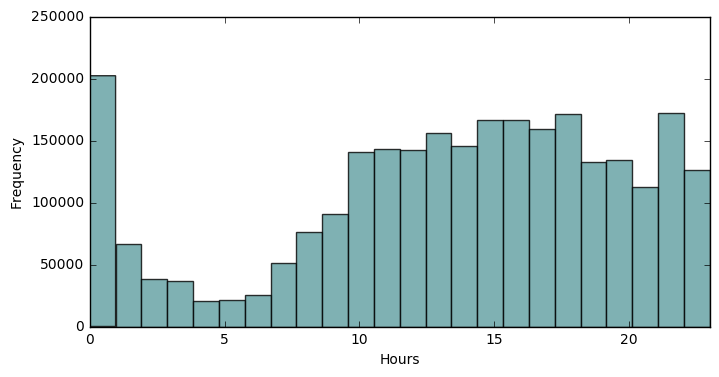

In [517]:
train.hour.plot(kind='hist',alpha=0.8 ,bins=24,figsize=(8,4), color ='cadetblue')
#train.hour.hist(alpha=0.5 ,bins=24,figsize=(8,4), color ='yellowgreen')
plt.xlabel("Hours", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
axes = plt.gca() 
axes.set_ylim([0,250000])
axes.set_xlim([0,23])

plt.show

### Weekday

In [447]:
df.weekday.unique()

array([1, 2, 5, 6, 3, 0, 4])

<function matplotlib.pyplot.show>

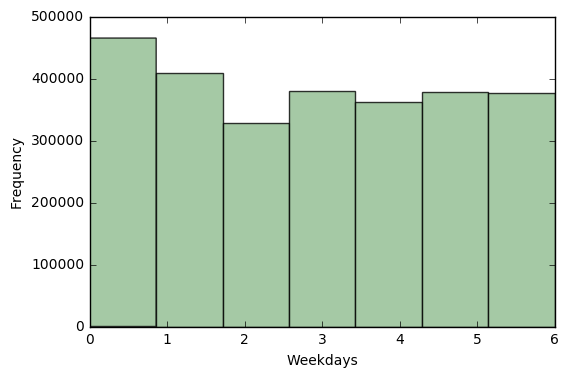

In [516]:
# weekday
train.weekday.plot(alpha=0.8,kind='hist',bins=7,figsize=(6,4), color ='darkseagreen')
#train.weekday.hist(alpha=0.5,bins=7,figsize=(6,4), color ='LightBlue')
plt.xlabel("Weekdays")
plt.ylabel("Frequency")

plt.show

### Useragent

<function matplotlib.pyplot.show>

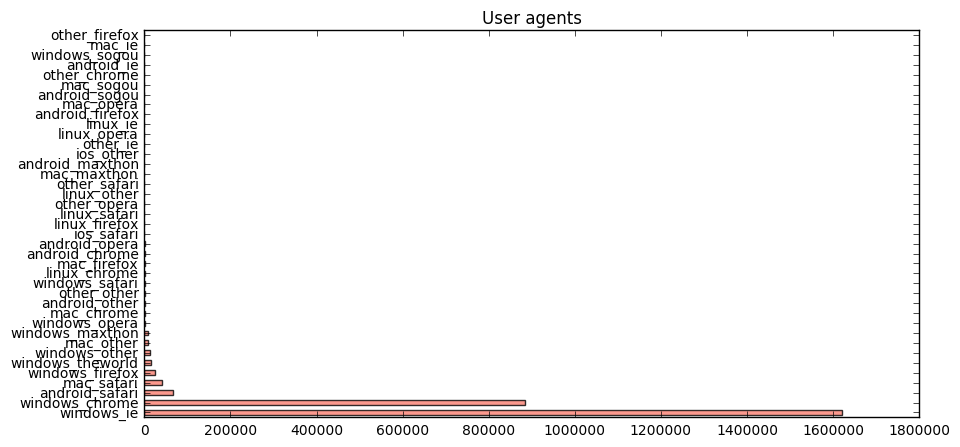

In [441]:
# useragent
train.useragent.value_counts().plot(kind='barh',alpha=0.8,figsize=(10,5), color ='salmon')
plt.title('User agents')

plt.show  

### Bidprice

In [31]:
# bidprice
df.bidprice.mean()

272.4581797787628

In [13]:
df.bidprice.unique()

array([300, 249, 238, 227, 277, 294, 241, 254])

<function matplotlib.pyplot.show>

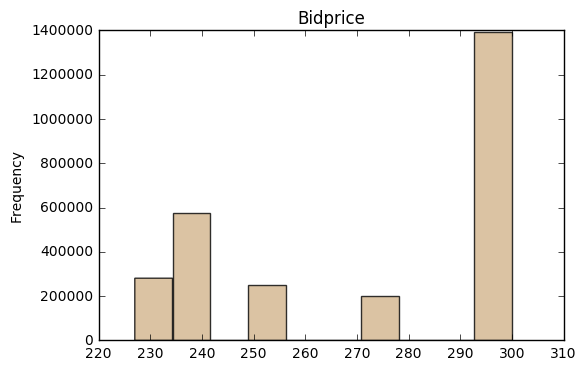

In [436]:
train.bidprice.plot(kind='hist',alpha=0.8,color='tan')
plt.title('Bidprice')

plt.show

### Payprice

In [434]:
# payprice
df.payprice.mean()

80.25102474739948

<function matplotlib.pyplot.show>

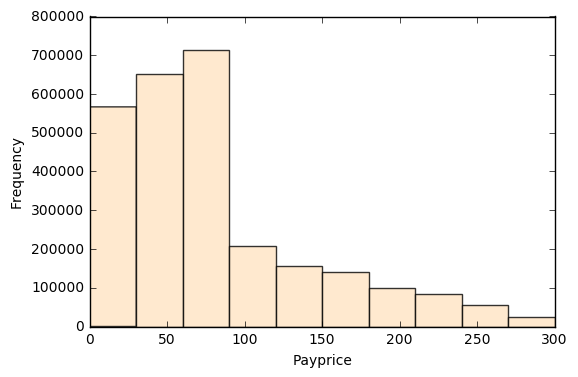

In [509]:
train.payprice.plot(kind='hist',alpha=0.8,color='bisque')
plt.xlabel("Payprice")
plt.ylabel("Frequency")

plt.show

### Slotprice

In [433]:
# slotprice
df.slotprice.mean()

26.484841745195418

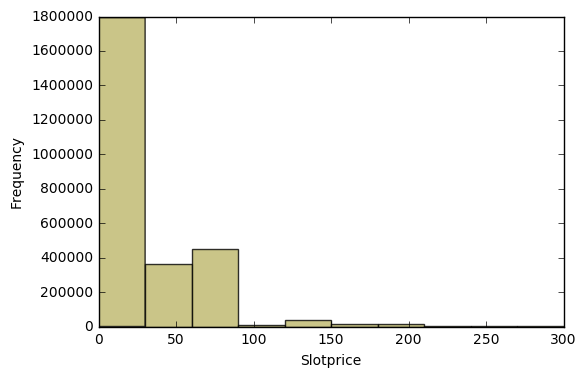

In [521]:
train.slotprice.plot(kind='hist', alpha=0.8,color='darkkhaki')
plt.xlabel("Slotprice")
plt.ylabel("Frequency")

plt.show()

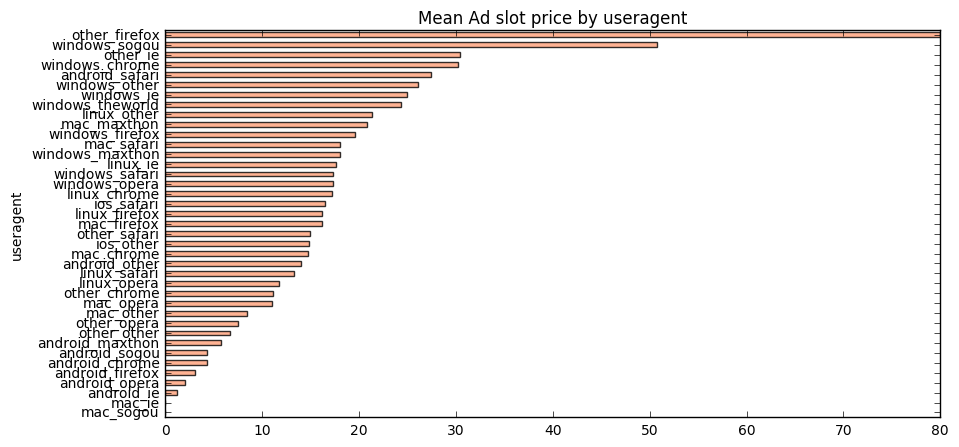

In [443]:
# slotprice by useragent 
idx = [6,19]
df1 = train.iloc[:,idx]
x = df1.groupby(['useragent']).mean()
#x.sort(columns='slotprice').plot(alpha=0.8,kind='barh',figsize=(8,6),color='lightsalmon')
x.sort_values(by='slotprice').plot(alpha=0.8,kind='barh',figsize=(10,5),legend=None,color='lightsalmon')
plt.legend
plt.title('Mean Ad slot price by useragent')

## 2. Advertisers ----------------------------------------------------------

In [117]:
print('There are', len(df.advertiser.unique()), 'advertisers in the dataset')

There are 9 advertisers in the dataset


#### Advertiser ID & Industrial Category 
- 1458 & Chinese vertical e-commerce
- 2259 & Milk powder
- 2261 & Telecom
- 2821 & Footwear
- 2997 & Mobile e-commerce app install
- 3358 & Software
- 3386 & International e-commerce
- 3427 & Oil
- 3476 & Tire

### Statistics

In [418]:
# basic statistics
data_st = pd.DataFrame()

data_st['advertiser'] = np.sort(train.advertiser.unique())
data_st['bids'] = train.groupby('advertiser').bidprice.sum().values
data_st['impressions'] = train.groupby('advertiser').size().values

click = train.groupby('advertiser').click.value_counts()
data_st['clicks'] = click.iloc[click.index.get_level_values('click') == 1].values  
data_st['cost'] = train.groupby('advertiser').payprice.sum().values #/1000 # display in fen or yuan unit
data_st['CTR'] = (((data_st.clicks / data_st.impressions) * 100).round(3)).astype(str) + '%'
data_st['CPM'] = (((data_st.cost / data_st.impressions) * 1000).round(2)).astype(str)
data_st['eCPC'] = ((data_st.cost / data_st.clicks).round(2)).astype(str)

data_st

,advertiser,bids,impressions,clicks,cost,CTR,CPM,eCPC
0,1458,162087900,540293,451,37231.239,0.083%,68.91,82.55
1,2259,42288044,146778,45,13649.026,0.031%,92.99,303.31
2,2261,34725172,120619,37,10789.152,0.031%,89.45,291.6
3,2821,67161076,231416,144,20625.766,0.062%,89.13,143.23
4,2997,15092899,54487,251,3413.227,0.461%,62.64,13.6
5,3358,70940083,304782,233,28145.288,0.076%,92.35,120.8
6,3386,149566200,498554,358,38341.028,0.072%,76.9,107.1
7,3427,107242176,454031,340,36820.111,0.075%,81.1,108.29
8,3476,85917235,346778,175,27481.402,0.05%,79.25,157.04


In [4]:
# max per advertisers
df.groupby(['advertiser']).max()

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,usertag
advertiser,,,,,,,,,,,,,,,,,,,,,
1458,1,6,23,fffffa9e354806bca2dfd563cc444a86,1,u_ZYqzZyl4O6cIG4,windows_theworld,99.76.8.*,395,399,...,1000,600,255,1,300,fb5afa9dba1274beaf3dad86baf97e89,300,300,bebefa5efe83beee17a3d245e7c5085b,null
2259,1,6,20,ffff8e032a5554cfa603add64a745635,1,u_DAMK068AyQA,windows_theworld,61.29.131.*,216,237,...,1000,600,ThirdView,Na,275,7336,294,294,null,null
2261,1,6,18,fffec5eecedaeeb631dc94e367522061,1,u_DARHZ58Lsof,windows_theworld,99.91.217.*,395,399,...,1000,600,ThirdView,Na,273,12633,294,294,null,null
2821,1,2,23,ffffa2aed64274f897114de00e9e0c20,1,u_DANKp11IzMH,windows_theworld,99.99.37.*,395,399,...,1000,600,ThirdView,Na,276,10734,294,294,null,null
2997,1,5,23,fffdfd1f3d1fa382ddfc80932017726d,1,u_DAQNs34UyLm,windows_ie,61.92.254.*,394,399,...,320,50,OtherView,Na,277,12987,277,277,null,null
3358,1,6,23,ffffca2ea4c21628e1006be446b373b0,1,u_ZYqzZk5dD989FH,windows_theworld,99.95.183.*,395,399,...,1000,600,255,5,238,fe222c13e927077ad3ea087a92c0935c,241,267,d29e59bf0f7f8243858b8183f14d4412,null
3386,1,6,23,ffffe96f8940d0ea84883d22832738a3,1,u_ZYqzVxpvOqR4Qt,windows_theworld,99.92.88.*,395,399,...,1000,600,255,5,300,ff5123fb9333ca095034c62fdaaf51aa,300,300,43f4a37f42a7c5e6219e2601b26c6976,null
3427,1,6,23,ffffff146834ba665b491c4404c42e38,1,u_ZYqzZn5aOQf9FH,windows_theworld,99.99.34.*,395,399,...,1000,600,255,5,238,fa8f0532dd5144b5fa748459e8d90b49,241,267,d41d8cd98f00b204e9800998ecf8427e,null
3476,1,6,23,ffffad6dd149a3e340de2bfed7e1b725,1,u_ZYqzZudEPUbIet,windows_theworld,99.98.65.*,395,399,...,1000,600,255,5,246,f65c8bdb41e9015970bac52baa813239,254,267,f4a09c06b67d0fcce088ee6e86ca052a,null


In [241]:
# pivotable
index = 'weekday'
pivotable = pd.pivot_table(data, values='click', index=[index],columns=['advertiser'], aggfunc=np.sum)
pivotable

advertiser,1458,2259,2261,2821,2997,3358,3386,3427,3476
weekday,,,,,,,,,
0,66.0,11.0,NaN,71.0,NaN,21.0,50.0,46.0,28.0
1,63.0,14.0,NaN,64.0,NaN,11.0,47.0,43.0,35.0
2,63.0,NaN,NaN,9.0,87.0,14.0,43.0,54.0,28.0
3,68.0,NaN,9.0,NaN,68.0,79.0,49.0,46.0,26.0
4,72.0,NaN,6.0,NaN,69.0,39.0,57.0,44.0,24.0
5,65.0,10.0,17.0,NaN,27.0,50.0,69.0,57.0,4.0
6,54.0,10.0,5.0,NaN,NaN,19.0,43.0,50.0,30.0


## 3. User feedback --------------------------------------------------------

Chose two advertisers for detailed CTR analysis

In [469]:
# advertiser 1458 and 3358
advs = [1458, 3358]

### Functions for plotting 

In [410]:
# line plots
def get_plots (feature) :
    dataframes = []
    for adv in advs:
        dfff = df[df['advertiser'] == adv]
        ctr = dfff.groupby(feature).agg({'click':{'click':sum}, 'bidid': {'imps' : 'count'}})
        ctr.columns = ctr.columns.droplevel(0)
        ctr['ctr'] = (ctr.click / ctr.imps) * 100
        dataframes.append(ctr)

    plt.plot(dataframes[0]['ctr'], label=str(advs[0]), marker='|')
    plt.plot(dataframes[1]['ctr'], label=str(advs[1]), marker='|')
    plt.ylabel('CTR')
    plt.xlabel(feature)
    plt.margins(0.05)
    plt.legend(loc='best')
    plt.show()

In [462]:
# error bar plots
def plot_ctr (dataframe,y,x,advs,i,j):
    adv="advertiser"
    # Mean time series:
    plt.figure(figsize=(i,j))
    for list_advert in advs:
        mean_data=dataframe.groupby([x,adv]).mean()
        ts_mean=mean_data.unstack(adv)[y][list_advert]

        # STD:
        std_data=dataframe.groupby([x,adv]).std()
        ts_std=std_data.unstack(adv)[y][list_advert]

        # Totals:
        totals=dataframe.groupby([x,adv]).count()
        ts_totals=totals.unstack(adv)[y][list_advert]

        # margin:
        margin=ts_std*2/np.sqrt(ts_totals)
    
        plt.errorbar(x=ts_mean.index,y=ts_mean, yerr=margin,fmt='--o')
        plt.legend(advs, loc='best', fancybox=True, framealpha=0.5)
        plt.ylabel('CTR')
        plt.xlabel(x)

In [412]:
# bar plots
def get_plots2 (feature, i):
    dataframes = []

    for adv in advs:
        df_b = df[df['advertiser'] == adv]
        agent = list(df_b.useragent)
        agent = [x.split('_')[i] for x in agent]
        df_b['agent'] = agent
        ctr = df_b.groupby('agent').agg({'click':{'click':sum}, 'bidid': {'imps' : 'count'}})
        ctr.columns = ctr.columns.droplevel(0)
        ctr['ctr'] = (ctr.click / ctr.imps) * 100
        dataframes.append(ctr)
        
    all_agent = list(df_b.agent.unique())
    all_agent.sort()
    x = np.arange(len(all_agent))
    width = 0.35

    plt.bar(x, dataframes[0]['ctr'], width=width, alpha= 0.8, color='royalblue', label=str(advs[0]))
    plt.bar(x + width, dataframes[1]['ctr'], width=width, alpha= 0.8,color='forestgreen', label=str(advs[1]))
    plt.ylabel('CTR')
    plt.xlabel(feature)
    plt.xticks(x + width / 2, all_agent)
    plt.margins(x=0.05)
    plt.legend(loc='best', fancybox=True, framealpha=0.5)
    plt.show()

### Weekday

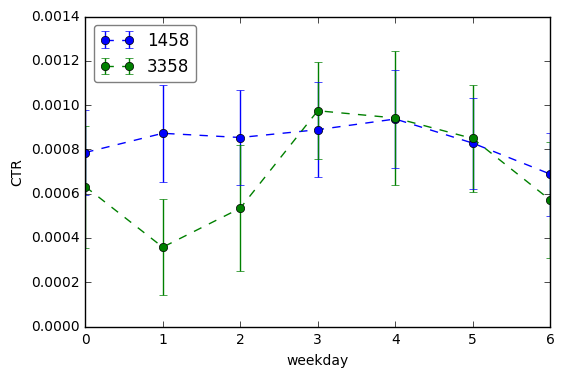

In [413]:
# weekday
plot_ctr(df,'click','weekday',list_advert,6,4)

### Hours

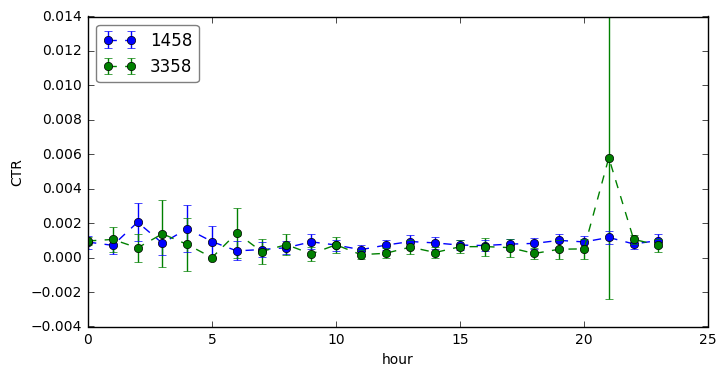

In [419]:
# weekday
plot_ctr(df,'click','hour',list_advert,8,4)

### Region

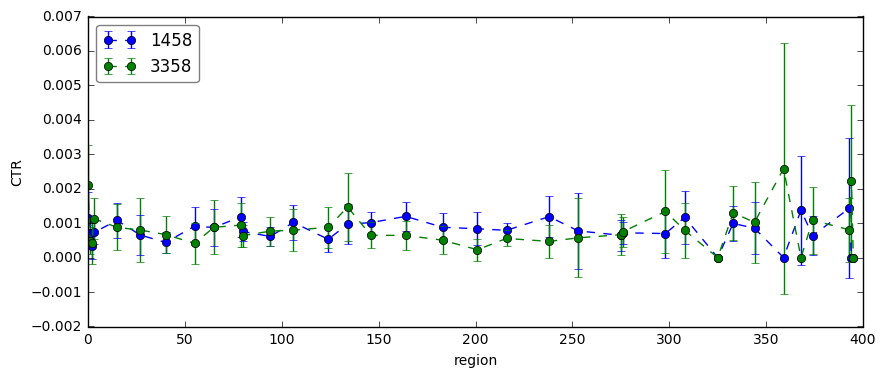

In [415]:
# region
plot_ctr(df,'click','region',list_advert,10,4)

### OS

/Users/bakuna/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


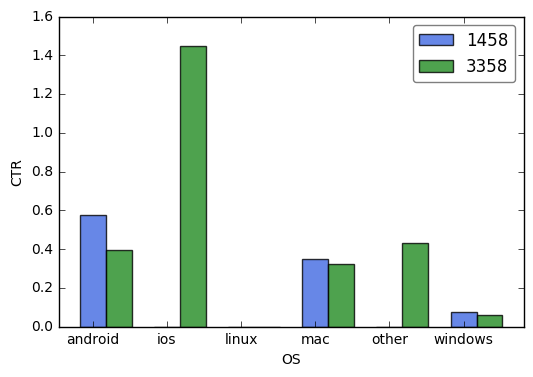

In [416]:
# OS
get_plots2('OS',0)

### Browser

/Users/bakuna/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


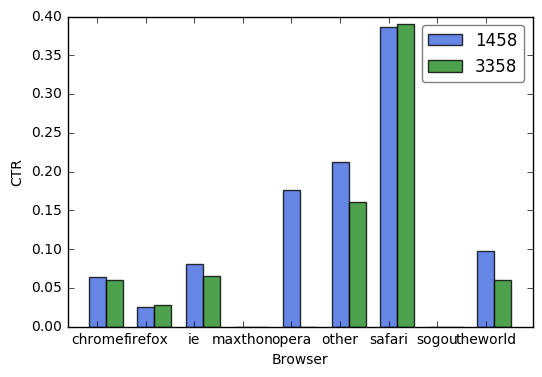

In [417]:
# browser
get_plots2('Browser',1)

### Adexchange

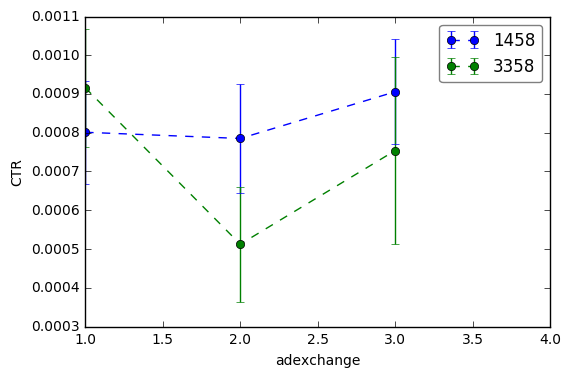

In [391]:
# adexchange
# error bar
df2 = pd.DataFrame(df.loc[df['adexchange'] != 'null'])
plot_ctr(df2,'click','adexchange',list_advert,6,4)

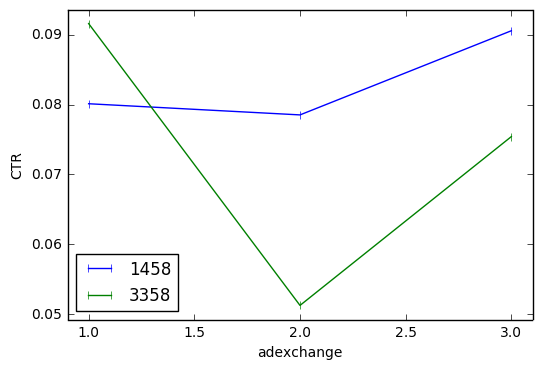

In [374]:
# line plot
get_plots('adexchange')

### Slotsize

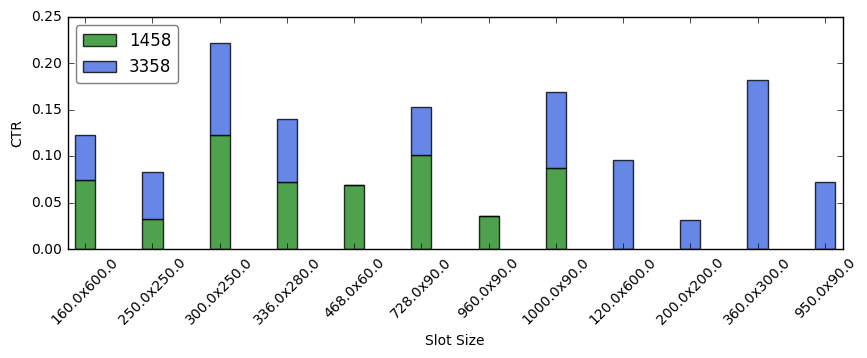

In [409]:
# slotsize
dataframes = []
for adv in advs:
    df_s = df[df['advertiser'] == adv]
    ctr = df_s.groupby(('slotwidth','slotheight'), as_index=False).agg({'click':{'click':sum}, 'bidid': {'imps' : 'count'}})
    ctr.columns = ctr.columns.droplevel(0)
    ctr['ctr'] = (ctr.click / ctr.imps) * 100
    ctr.columns = ['slotwidth','slotheight','imps','click','ctr']
    dataframes.append(ctr)

new_df = pd.merge(dataframes[0], dataframes[1], how='outer', on=['slotwidth','slotheight'])
new_df = new_df.fillna(0)

labels = list(new_df[['slotwidth','slotheight']].values)
labels_str = [str(l[0]) + 'x' + str(l[1]) for l in labels]
labels_str

fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(111)
x = np.arange(len(new_df.slotwidth))
width = 0.3

p1 = ax.bar(x, new_df['ctr_x'], width, alpha=0.8, color='forestgreen', label=advs[0])
p2 = ax.bar(x, new_df['ctr_y'], width, alpha=0.8,color='royalblue', bottom=new_df['ctr_x'], label=advs[1])
ax.set_xlabel('Slot Size')
ax.set_ylabel('CTR')
ax.margins(x=0.01)
ax.set_xticks(x + width/2)
ax.legend(loc='best', fancybox=True, framealpha=0.5)
ax.set_xticklabels(labels_str, rotation=45)

plt.show()


## 4. Bidding behaviour -----------------------------------------------

 Conducting the analysis for the payprice (market price/floor price) against featurs like the section 3 (user feedback).

In [465]:
# function
# error bar plots
def plot_price (dataframe,y,x,advs,i,j):
    adv="advertiser"
    # Mean time series:
    plt.figure(figsize=(i,j))
    for list_advert in advs:
        mean_data=dataframe.groupby([x,adv]).mean()
        ts_mean=mean_data.unstack(adv)[y][list_advert]

        # STD:
        std_data=dataframe.groupby([x,adv]).std()
        ts_std=std_data.unstack(adv)[y][list_advert]

        # Totals:
        totals=dataframe.groupby([x,adv]).count()
        ts_totals=totals.unstack(adv)[y][list_advert]

        # margin:
        margin=ts_std*2/np.sqrt(ts_totals)
    
        plt.errorbar(x=ts_mean.index,y=ts_mean, yerr=margin,fmt='--o')
        plt.legend(advs, loc='best', fancybox=True, framealpha=0.5)
        plt.ylabel('Market Price')
        plt.xlabel(x)

### payprice with chosen features

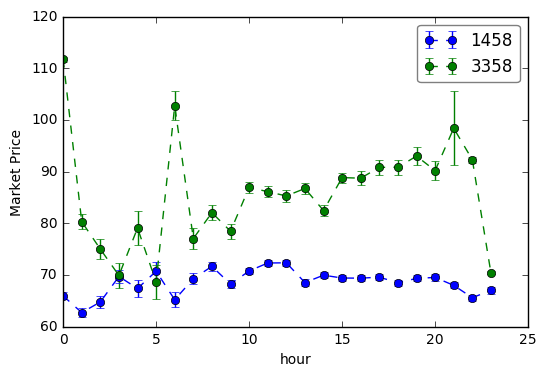

In [504]:
# try different features here
plot_price(df,'payprice','hour',advs,6,4)

## 5. eCPC --------------------------------------------------------------

chose advertiser 3358 here for analysis

In [502]:
# function
def get_ecpc (x):
    ecpc = pd.DataFrame()

    click = train.groupby(['advertiser',x]).click.sum()
    payprice = train.groupby([x,'advertiser']).payprice.sum()

    ecpc[x] = np.sort(train[x].unique())
    ecpc['clicks'] = click.iloc[click.index.get_level_values('advertiser') == 3358].values
    ecpc['payprice'] = payprice.iloc[payprice.index.get_level_values('advertiser') == 3358].values
    ecpc['ecpc'] = ((ecpc.payprice / ecpc.clicks) * 100).round(3)
    
    #return ecpc
    ecpc.ecpc.plot(by=x,kind='bar',figsize=(8,4), color= 'silver')
    plt.xlabel(x)
    plt.ylabel("eCPC")
    plt.show()

### eCPC with chosen features

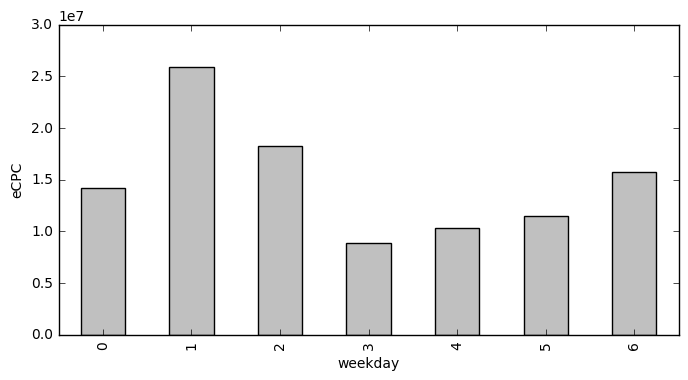

In [513]:
# try different features here
get_ecpc ('weekday')